In [1]:
import scanpy as sc
import numpy as np
#import matplotlib.pyplot as plt
import singleCellHaystack as hs
import timeit

sc.set_figure_params(facecolor="white", dpi=90)

# Load toy data

In [2]:
adata = hs.load_toy()
adata

AnnData object with n_obs × n_vars = 601 × 500
    obsm: 'X_tsne'

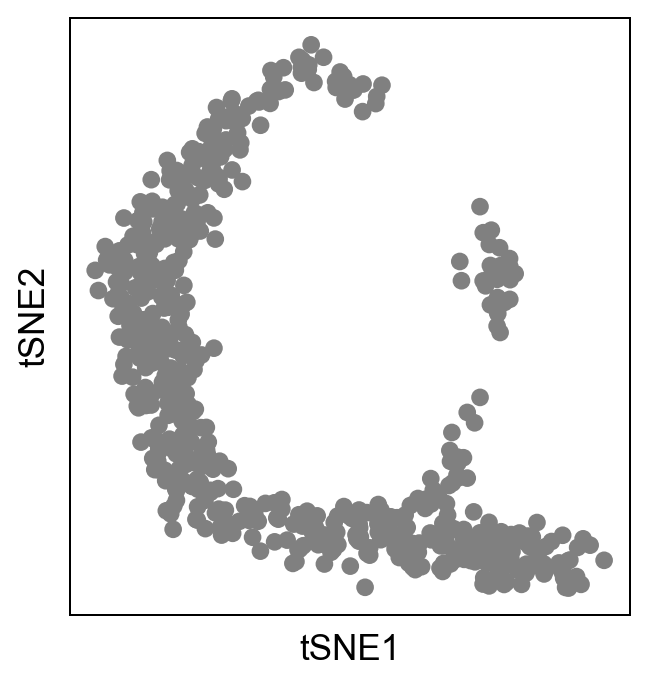

In [3]:
sc.pl.scatter(adata, basis="tsne")

# Run haystack

In [4]:
#%%timeit -n 1 -r 1
np.random.seed(1)
res = hs.haystack(adata, coord="tsne", n_randomizations=100, n_genes_to_randomize=100, spline_method="ns")

> starting haystack ...
> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 500 features ...


100%|██████████| 500/500 [00:00<00:00, 7088.16it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████| 100/100 [00:01<00:00, 93.77it/s]


> calculating P values ...
> done.


# QC

We can examine some of the QC plots. First the randomization fits. These are used to calculate KLD from randomized expression levels for a subset of genes, in order to estimate the values to the entire gene set.

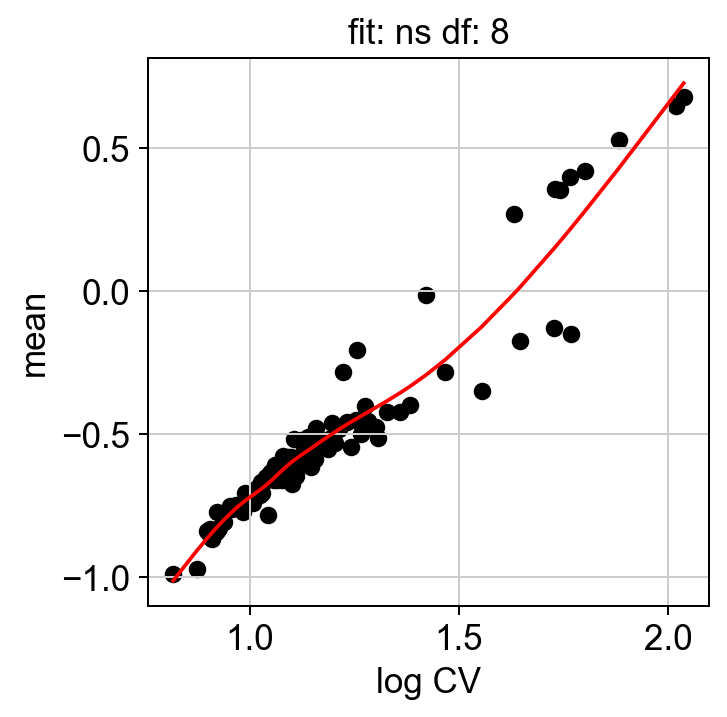

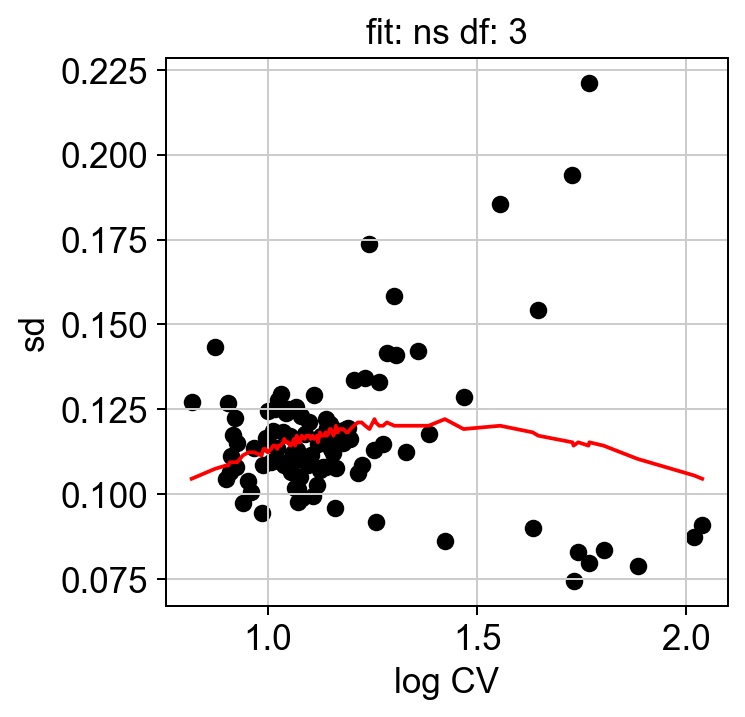

In [5]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

The ranking of logpval and distribution of pval gives us some idea of how many significant genes we can detect.

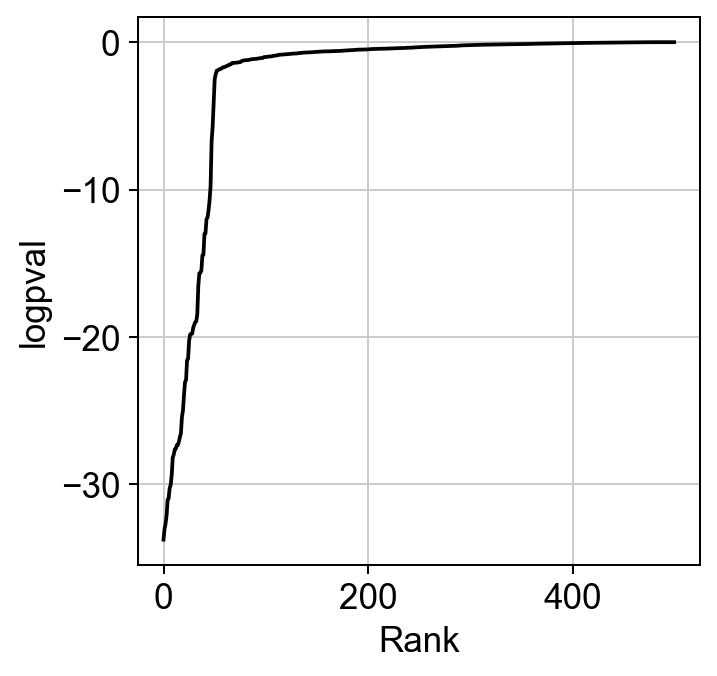

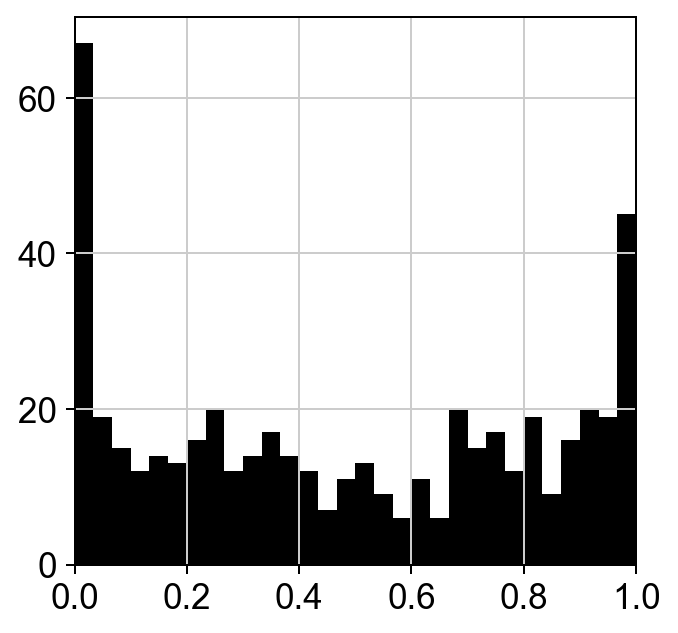

In [6]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

# Results

A pandas DataFrame with the results can be obtained. By default the results are sorted by logpval_adj.

In [7]:
sum = res["results"]
sum

,gene,KLD,pval,pval_adj,logpval,logpval_adj
241,gene_242,1.744636,1.720239e-34,8.601196e-32,-3.376441e+01,-31.065441
338,gene_339,1.840823,9.452066e-34,4.726033e-31,-3.302447e+01,-30.325503
274,gene_275,1.788655,2.097273e-33,1.048636e-30,-3.267835e+01,-29.979375
61,gene_62,2.092214,7.736506e-33,3.868253e-30,-3.211146e+01,-29.412485
496,gene_497,1.913097,8.537419e-32,4.268710e-29,-3.106867e+01,-28.369703
...,...,...,...,...,...,...
354,gene_355,0.473289,9.999995e-01,1.000000e+00,-2.225398e-07,0.000000
397,gene_398,0.442624,9.999997e-01,1.000000e+00,-1.394304e-07,0.000000
463,gene_464,0.372944,9.999997e-01,1.000000e+00,-1.388830e-07,0.000000
374,gene_375,0.464539,1.000000e+00,1.000000e+00,-1.847860e-09,0.000000


Plot top 4 genes.

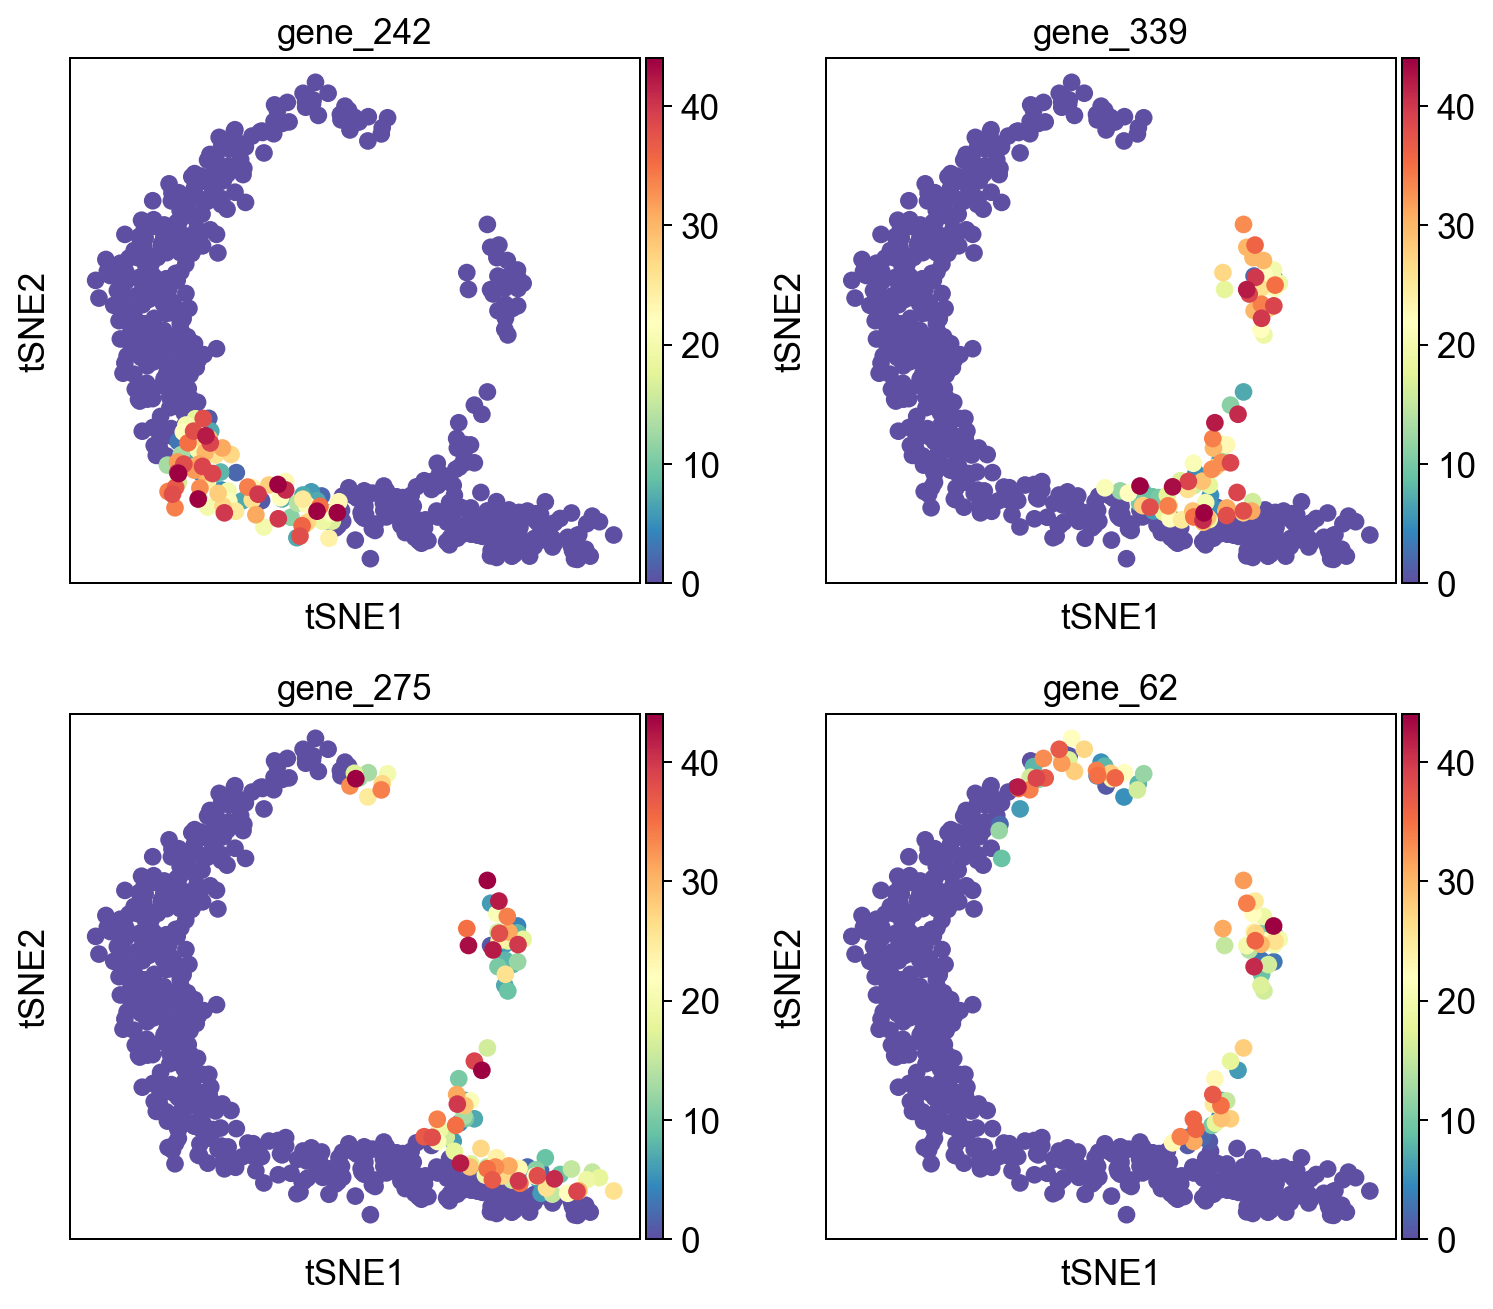

In [8]:
sc.pl.tsne(adata, color=sum.gene.iloc[:4], ncols=2, cmap="Spectral_r")

# Export results

In [9]:
#sum.to_csv("toy-results.tsv")